<a href="https://colab.research.google.com/github/ericliudx/usb-drive-reliability/blob/main/Flash_Drive_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Example component-level data
data = [
    {"Component": "Flash IC", "lambda_b": 0.005, "pi_T": 2.0, "pi_E": 1.5, "pi_Q": 1.2, "pi_L": 1.0},
    {"Component": "Controller", "lambda_b": 0.004, "pi_T": 1.8, "pi_E": 1.5, "pi_Q": 1.0, "pi_L": 1.0},
    {"Component": "Connector", "lambda_b": 0.002, "pi_T": 1.0, "pi_E": 1.5, "pi_Q": 1.0, "pi_L": 1.0},
]

df = pd.DataFrame(data)

# Compute predicted failure rate (failures per 10^6 hours)
df["lambda_p"] = df["lambda_b"] * df["pi_T"] * df["pi_E"] * df["pi_Q"] * df["pi_L"]
df["MTTF_hours"] = 1_000_000 / df["lambda_p"]
df


,Component,lambda_b,pi_T,pi_E,pi_Q,pi_L,lambda_p,MTTF_hours
0,Flash IC,0.005,2.0,1.5,1.2,1.0,0.0180,5.555556e+07
1,Controller,0.004,1.8,1.5,1.0,1.0,0.0108,9.259259e+07
2,Connector,0.002,1.0,1.5,1.0,1.0,0.0030,3.333333e+08


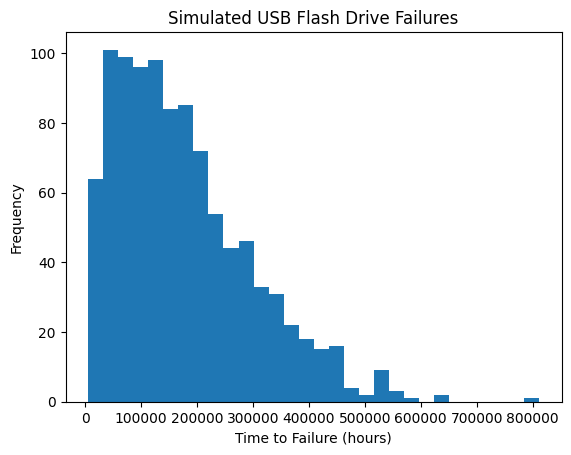

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated time-to-failure data (in hours)
np.random.seed(42)
beta = 1.5  # shape parameter (wear-out)
eta = 2e5   # scale parameter (characteristic life)
failure_times = np.random.weibull(beta, 1000) * eta

plt.hist(failure_times, bins=30)
plt.xlabel("Time to Failure (hours)")
plt.ylabel("Frequency")
plt.title("Simulated USB Flash Drive Failures")
plt.show()


Weibull shape β = 1.49, scale η = 195770 hours


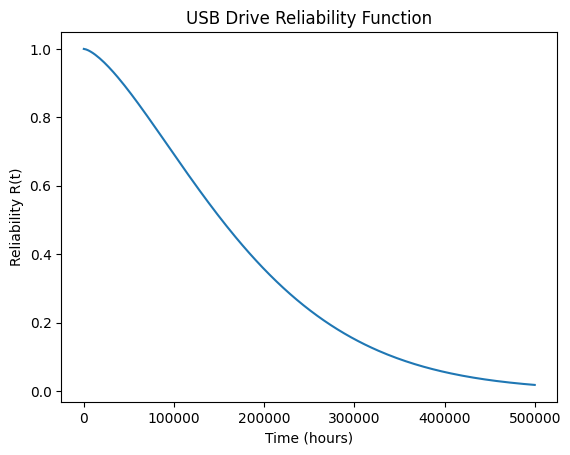

In [3]:
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

shape, loc, scale = weibull_min.fit(failure_times, floc=0)

print(f"Weibull shape β = {shape:.2f}, scale η = {scale:.0f} hours")

# Plot reliability function
t = np.linspace(0, 5e5, 200)
R = np.exp(- (t/scale)**shape)

plt.plot(t, R)
plt.xlabel("Time (hours)")
plt.ylabel("Reliability R(t)")
plt.title("USB Drive Reliability Function")
plt.show()


In [5]:
fmeca = pd.DataFrame([
    {"Failure Mode": "Connector fatigue", "Severity": 9, "Occurrence": 4, "Detection": 5},
    {"Failure Mode": "Controller lock-up", "Severity": 8, "Occurrence": 3, "Detection": 6},
    {"Failure Mode": "Flash bit error", "Severity": 7, "Occurrence": 6, "Detection": 3},
])

fmeca["RPN"] = fmeca["Severity"] * fmeca["Occurrence"] * fmeca["Detection"]
fmeca.sort_values("RPN", ascending=False)


,Failure Mode,Severity,Occurrence,Detection,RPN
0,Connector fatigue,9,4,5,180
1,Controller lock-up,8,3,6,144
2,Flash bit error,7,6,3,126
